## Installation

The following libraries are required for this TP:
- librosa
- numpy
- sklearn
- warnings
- HMMlearn


### HMM learn
**hmmlearn** is a set of algorithms for unsupervised learning and inference of **Hidden Markov Models**. 
If you have python 3.6.* you can simply install hmmlearn with the command:
```
pip install hmmlearn
```

#### !!! STILL NOT WORKING with Python 3.7.* !!!
If you have python 3.7.* you need to install hmmlearn from the source (git).
Follow the instruction here: https://pypi.org/project/hmmlearn/
However some compatibility issues with the last version of sklearn are not completely resolved...

In [1]:
# !!! STILL NOT WORKING with Python 3.7.* !!!
import sys

if sys.version_info[1] >= 7:
    print("Version >=7")
    # Fix issue in paramz
    import re

    re._pattern_type = re.Pattern# Imports



In [2]:
from hmmlearn import hmm

In [3]:
import librosa
from librosa import load
import numpy as np
import sklearn
import warnings
import matplotlib.pyplot as plt
import itertools
warnings.filterwarnings('ignore')

# Constants

In [4]:
SR = 16000 # Audio sampling rate
HOP_LENGTH = 128 # Size of a frame (8ms at 16kHz)
NB_COEFFICIENT = 12 # For MFCC

# Read audio files

In [5]:
# The audio files are in a 'wave' folder
# Train set
train_1 = [load("wave/1_1.wav", SR)[0], load("wave/1_2.wav", SR)[0], load("wave/1_3.wav", SR)[0]] # "un"
train_2 = [load("wave/2_1.wav", SR)[0], load("wave/2_2.wav", SR)[0], load("wave/2_3.wav", SR)[0]] # "deux"
train_3 = [load("wave/3_1.wav", SR)[0], load("wave/3_2.wav", SR)[0], load("wave/3_3.wav", SR)[0]] # ...
train_4 = [load("wave/4_1.wav", SR)[0], load("wave/4_2.wav", SR)[0], load("wave/4_3.wav", SR)[0]]
train_5 = [load("wave/5_1.wav", SR)[0], load("wave/5_2.wav", SR)[0], load("wave/5_3.wav", SR)[0]]

# Test set
test_1 = [load("wave/1t.wav", SR)[0]] # "un"
test_2 = [load("wave/2t.wav", SR)[0]] # "deux"
test_3 = [load("wave/3t.wav", SR)[0]] # ...
test_4 = [load("wave/4t.wav", SR)[0]]
test_5 = [load("wave/5t.wav", SR)[0]]
test_p = [load("wave/peu.wav", SR)[0]]

# Feature extraction

In [6]:
def mfcc(y):
    """
    Apply Mel-frequency cepstral coefficients (MFCCs) on a audio time serie.
    Hypothesis: 
    - Sampling rate is at costant sampling rate (SR)
    """
    mfccs = librosa.feature.mfcc(y, SR, n_mfcc=NB_COEFFICIENT, hop_length=HOP_LENGTH)
    mfccs = sklearn.preprocessing.scale(mfccs, axis=1) # Scale to unit variance and zero mean
    return mfccs.transpose() # To have frames on the 0 axis

In [7]:
train_1_c = list(map(mfcc, train_1))
train_2_c = list(map(mfcc, train_2))
train_3_c = list(map(mfcc, train_3))
train_4_c = list(map(mfcc, train_4))
train_5_c = list(map(mfcc, train_5))

test_1_c = list(map(mfcc, test_1))
test_2_c = list(map(mfcc, test_2))
test_3_c = list(map(mfcc, test_3))
test_4_c = list(map(mfcc, test_4))
test_5_c = list(map(mfcc, test_5))
test_p_c = list(map(mfcc, test_p))

# Durations and number of acoustic vectors

In [8]:
def print_duration_nb_accoustic_models(time_series, cepstr):
    # TODO
    # example of possible result:
    # Duration [ms]: 962.3125
    samples = len(time_series)
    print("Duration [ms]: ",np.round(sum([len(i) for i in time_series])/samples * 1000 / SR))
    # Nb. accoustic vectors: 121
    
    print("Nb. accoustic vectors: ", np.round(sum([len(i) for i in cepstr])/samples))

In [9]:
print("Train 1:")
print_duration_nb_accoustic_models(train_1, train_1_c)
print("Train 2:")
print_duration_nb_accoustic_models(train_2, train_2_c)
print("Train 3:")
print_duration_nb_accoustic_models(train_3, train_3_c)
print("Train 4:")
print_duration_nb_accoustic_models(train_4, train_4_c)
print("Train 5:")
print_duration_nb_accoustic_models(train_5, train_5_c)

Train 1:
Duration [ms]:  786.0
Nb. accoustic vectors:  99.0
Train 2:
Duration [ms]:  929.0
Nb. accoustic vectors:  117.0
Train 3:
Duration [ms]:  979.0
Nb. accoustic vectors:  123.0
Train 4:
Duration [ms]:  918.0
Nb. accoustic vectors:  115.0
Train 5:
Duration [ms]:  1122.0
Nb. accoustic vectors:  141.0


# Train a model for each class

In [10]:
def concatenate_cepstrums(dataset):
    """
    hmmlearning can ingest a long serie containing multiple series
    you need to pass the serie and length of each
    """
    X = np.concatenate(dataset)
    lengths = [c.shape[0] for c in dataset]
    return X, lengths

## "un"

In [11]:
N = 3
X, lengths = concatenate_cepstrums(train_1_c)
model_1 = hmm.GaussianHMM(n_components=N,verbose=True)
model_1.fit(X, lengths)

         1       -4322.2532             +nan
         2       -2857.0943       +1465.1589
         3       -2834.8226         +22.2717
         4       -2824.0607         +10.7619
         5       -2812.8191         +11.2416
         6       -2803.6333          +9.1858
         7       -2796.0208          +7.6125
         8       -2788.9168          +7.1040
         9       -2783.1015          +5.8152
        10       -2778.2912          +4.8103


GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=3, n_iter=10, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=True)

Text(0.5, 1.0, 'Convergence monitor')

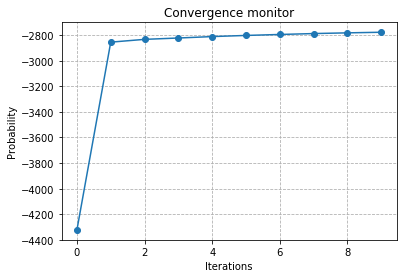

In [12]:
res = [-4322.1778,-2855.0890,-2833.3126,-2822.7008,-2811.5503,-2802.6603,-2795.0703,-2788.0685,-2782.4572,-2777.6910,]
plt.plot(range(len(res)),res,'-o')
plt.grid(linestyle='--')
plt.xlabel('Iterations')
plt.ylabel('Probability')
plt.title('Convergence monitor')

## "deux"

In [13]:
N = 4
X, lengths = concatenate_cepstrums(train_2_c)
model_2 = hmm.GaussianHMM(n_components=N,verbose=True)
model_2.fit(X, lengths)

         1       -5142.8416             +nan
         2       -3549.5392       +1593.3024
         3       -3463.8089         +85.7302
         4       -3240.7068        +223.1022
         5       -3196.7897         +43.9171
         6       -3194.1330          +2.6567
         7       -3193.5220          +0.6110
         8       -3193.1149          +0.4071
         9       -3192.8675          +0.2474
        10       -3192.7581          +0.1094


GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=4, n_iter=10, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=True)

## "trois"

In [14]:
N = 6
X, lengths = concatenate_cepstrums(train_3_c)
model_3 = hmm.GaussianHMM(n_components=N,verbose=True)
model_3.fit(X, lengths)

         1       -5269.9946             +nan
         2       -2606.1988       +2663.7957
         3       -2535.9326         +70.2662
         4       -2527.7043          +8.2283
         5       -2526.0299          +1.6745
         6       -2524.5606          +1.4693
         7       -2524.3342          +0.2264
         8       -2524.2180          +0.1162
         9       -2524.1452          +0.0727
        10       -2524.1023          +0.0429


GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=6, n_iter=10, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=True)

## "quatre"

In [15]:
N = 6
X, lengths = concatenate_cepstrums(train_4_c)
model_4 = hmm.GaussianHMM(n_components=N,verbose=True)
model_4.fit(X, lengths)

         1       -5035.3217             +nan
         2       -2785.3690       +2249.9527
         3       -2699.8863         +85.4827
         4       -2690.0618          +9.8245
         5       -2688.2028          +1.8590
         6       -2686.8752          +1.3276
         7       -2685.7449          +1.1302
         8       -2685.0865          +0.6584
         9       -2684.7300          +0.3565
        10       -2684.2517          +0.4783


GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=6, n_iter=10, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=True)

## "cinq"

In [16]:
N = 5
X, lengths = concatenate_cepstrums(train_5_c)
model_5 = hmm.GaussianHMM(n_components=N,verbose=True)
model_5.fit(X, lengths)

         1       -6071.3759             +nan
         2       -3594.9142       +2476.4618
         3       -3520.2224         +74.6918
         4       -3483.3850         +36.8373
         5       -3454.8332         +28.5519
         6       -3437.9860         +16.8472
         7       -3425.4816         +12.5044
         8       -3415.6950          +9.7867
         9       -3403.3201         +12.3749
        10       -3393.3039         +10.0162


GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=5, n_iter=10, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=True)

# Test unseen data

In [17]:
def test(dataset, models):
    X, lengths = concatenate_cepstrums(dataset)
    scores = [m.score(X, lengths) for m in models]
    print(scores)
    print(f"Best model: {np.argmax(scores) + 1}")

## "un"

In [18]:
test(test_1_c, [model_1, model_2, model_3, model_4, model_5])

[-1296.9670337492496, -2045.6247805749315, -2410.2250442454665, -2695.1296970369517, -2323.687011475968]
Best model: 1


## "deux"

In [19]:
test(test_2_c, [model_1, model_2, model_3, model_4, model_5])

[-3281.451773261851, -1974.6558306749444, -3505.680991184694, -2718.6722389850434, -4000.1758129319137]
Best model: 2


## "trois"

In [20]:
test(test_3_c, [model_1, model_2, model_3, model_4, model_5])

[-4245.06407293808, -3629.7264393548385, -2138.235391359644, -3883.3247498258443, -3768.841461611948]
Best model: 3


## "quatre"

In [21]:
test(test_4_c, [model_1, model_2, model_3, model_4, model_5])

[-5359.426814490267, -4382.479221441966, -5171.364067098545, -3330.6013084054366, -4946.028910658336]
Best model: 4


## "cinq"

In [22]:
test(test_5_c, [model_1, model_2, model_3, model_4, model_5])

[-3785.079814563636, -3988.1236442827103, -4062.603164861179, -3872.890133472385, -1612.2832490308251]
Best model: 5


## "peu"

In [23]:
# TODO: tester avec le mot peu
test(test_p_c, [model_1, model_2, model_3, model_4, model_5])

[-3886.811424635578, -4156.665938405771, -4432.257594377506, -4802.54188689943, -5213.145677353608]
Best model: 1


# Train a model for each class using LR Transition Probabilities

## "un"

In [24]:
N = 3

X, lengths = concatenate_cepstrums(train_1_c)

# TODO: complete the following lines in order to train a HMM with a Left Right Topology
# you will need to look at the hmmlearn documentation
model_1_lr = hmm.GaussianHMM(n_components=N,covariance_type="diag",verbose=True)

model_1_lr.startprob_ = np.zeros(N)
model_1_lr.startprob_[0]=1.0

model_1_lr.transmat_ = (np.identity(N) + np.diagflat(np.ones(N-1),1)) * 0.5
model_1_lr.transmat_[-1,-1]=1.0

model_1_lr.fit(X, lengths) 

         1       -4322.2532             +nan
         2       -2857.0943       +1465.1589
         3       -2834.8226         +22.2717
         4       -2824.0607         +10.7619
         5       -2812.8191         +11.2416
         6       -2803.6333          +9.1858
         7       -2796.0208          +7.6125
         8       -2788.9168          +7.1040
         9       -2783.1015          +5.8152
        10       -2778.2912          +4.8103


GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=3, n_iter=10, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=True)

Text(0.5, 1.0, 'Convergence monitor comparison')

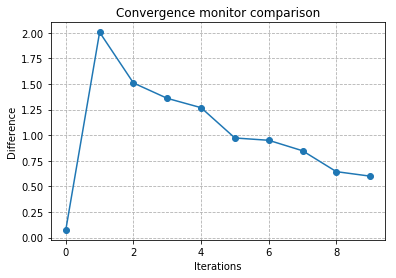

In [25]:
res2=[-4322.2532,-2857.0943,-2834.8226,-2824.0607,-2812.8191,-2803.6333,-2796.0208,-2788.9168,-2783.1015,-2778.2912]
plt.plot(range(len(res)),np.array(res)-np.array(res2),'-o')
plt.grid(linestyle='--')
plt.xlabel('Iterations')
plt.ylabel('Difference')
plt.title('Convergence monitor comparison')

## "deux"

In [26]:
N = 4
X, lengths = concatenate_cepstrums(train_2_c)
model_2_lr = hmm.GaussianHMM(n_components=N, covariance_type="diag")#, init_params="cm", params="cmt")
# TODO 
model_2_lr.startprob_ = np.zeros(N)
model_2_lr.startprob_[0]=1.0
model_2_lr.transmat_ = (np.identity(N) + np.diagflat(np.ones(N-1),1)) * 0.5
model_2_lr.transmat_[-1,-1]=1.0


model_2_lr.fit(X, lengths) 

GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=4, n_iter=10, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

## "trois"

In [27]:
N = 6
X, lengths = concatenate_cepstrums(train_3_c)
model_3_lr = hmm.GaussianHMM(n_components=N, covariance_type="diag", init_params="cm", params="cmt")
# TODO 
model_3_lr.startprob_ = np.zeros(N)
model_3_lr.startprob_[0]=1.0
model_3_lr.transmat_ = (np.identity(N) + np.diagflat(np.ones(N-1),1)) * 0.5
model_3_lr.transmat_[-1,-1]=1.0

model_3_lr.fit(X, lengths) 

GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
      covars_weight=1, init_params='cm', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=6, n_iter=10, params='cmt',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

## "quatre"

In [28]:
N = 6
X, lengths = concatenate_cepstrums(train_4_c)
model_4_lr = hmm.GaussianHMM(n_components=N, covariance_type="diag", init_params="cm", params="cmt")
# TODO 
model_4_lr.startprob_ = np.zeros(N)
model_4_lr.startprob_[0]=1.0
model_4_lr.transmat_ = (np.identity(N) + np.diagflat(np.ones(N-1),1)) * 0.5
model_4_lr.transmat_[-1,-1]=1.0

model_4_lr.fit(X, lengths) 

GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
      covars_weight=1, init_params='cm', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=6, n_iter=10, params='cmt',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

## "cinq"

In [29]:
N = 5
X, lengths = concatenate_cepstrums(train_5_c)
model_5_lr = hmm.GaussianHMM(n_components=N, covariance_type="diag", init_params="cm", params="cmt")
# TODO
model_5_lr.startprob_ = np.zeros(N)
model_5_lr.startprob_[0]=1.0
model_5_lr.transmat_ = (np.identity(N) + np.diagflat(np.ones(N-1),1)) * 0.5
model_5_lr.transmat_[-1,-1]=1.0

model_5_lr.fit(X, lengths) 

GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
      covars_weight=1, init_params='cm', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=5, n_iter=10, params='cmt',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

# Test unseen data (LR topology)

In [30]:
def test(dataset, models):
    X, lengths = concatenate_cepstrums(dataset)
    scores = [m.score(X, lengths) for m in models]
    print(scores)
    print(f"Best model: {np.argmax(scores) + 1}")
    return scores

## "un"

In [31]:
cm = np.zeros((5,5))
cm[0] = test(test_1_c, [model_1_lr, model_2_lr, model_3_lr, model_4_lr, model_5_lr])

[-1296.9670337492496, -2045.6247805749315, -2093.318862962895, -2137.6265246268435, -1727.2844953399563]
Best model: 1


## "deux"

In [32]:
cm[1] = test(test_2_c, [model_1_lr, model_2_lr, model_3_lr, model_4_lr, model_5_lr])

[-3281.451773261851, -1974.6558306749444, -3378.200734953485, -2691.553804914546, -2777.766687838765]
Best model: 2


## "trois"

In [33]:
cm[2] = test(test_3_c, [model_1_lr, model_2_lr, model_3_lr, model_4_lr, model_5_lr])

[-4245.06407293808, -3629.7264393548385, -2254.6120169816922, -3120.586946468719, -2801.498381952835]
Best model: 3


## "quatre"

In [34]:
cm[3] = test(test_4_c, [model_1_lr, model_2_lr, model_3_lr, model_4_lr, model_5_lr])

[-5359.426814490267, -4382.479221441966, -4926.444602768058, -3001.0228806539044, -4562.734146038673]
Best model: 4


## "cinq"

In [35]:
cm[4] = test(test_5_c, [model_1_lr, model_2_lr, model_3_lr, model_4_lr, model_5_lr])

[-3785.079814563636, -3988.1236442827103, -3598.3280416245293, -2842.066591209631, -2262.356351614572]
Best model: 5


## "peu"

In [36]:
peu_test = test(test_p_c, [model_1_lr, model_2_lr, model_3_lr, model_4_lr, model_5_lr])

[-3886.811424635578, -4156.665938405771, -4254.887784022105, -4197.45891486229, -3715.2005420989467]
Best model: 5


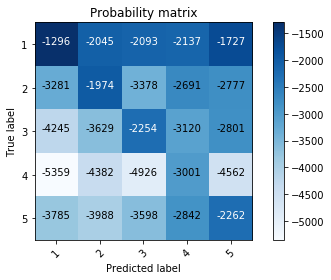

In [37]:
def plot_confusion_matrix(cm, classes):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Probability matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.min() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

labels_str = [str(i+1) for i in range(5)]
plot_confusion_matrix(cm.astype(np.int),labels_str)

Text(0.5, 1.0, 'Probability of "peu"')

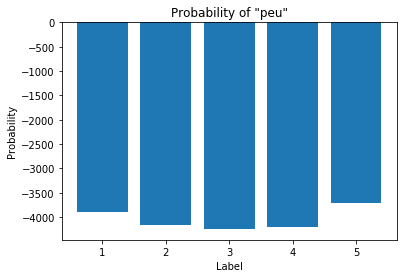

In [38]:
plt.bar(range(1,6),np.array(peu_test))
plt.xlabel('Label')
plt.ylabel('Probability')
plt.title('Probability of "peu"')

# Test on colleague data

In [46]:
# les sons ont été normalisés
coll_test_1 = list(map(mfcc, [load("wave/colleague/1tn.wav", SR)[0]]))
coll_test_2 = list(map(mfcc, [load("wave/colleague/2tn.wav", SR)[0]]))
coll_test_3 = list(map(mfcc, [load("wave/colleague/3tn.wav", SR)[0]]))
coll_test_4 = list(map(mfcc, [load("wave/colleague/4tn.wav", SR)[0]]))
coll_test_5 = list(map(mfcc, [load("wave/colleague/5tn.wav", SR)[0]]))

cm = np.zeros((5,5))

## "un"

In [47]:
cm[0] = test(coll_test_1, [model_1, model_2, model_3, model_4, model_5])

[-1387.0553600158023, -1219.9120522757626, -1501.3810620085133, -1444.9883742568038, -1317.5038489397375]
Best model: 2


## "deux"

In [48]:
cm[1] = test(coll_test_2, [model_1, model_2, model_3, model_4, model_5])

[-1666.2842821934248, -1118.5371012718856, -1674.6210040151489, -1528.3231592519949, -1781.644052926408]
Best model: 2


## "trois"

In [49]:
cm[2] = test(coll_test_3, [model_1, model_2, model_3, model_4, model_5])

[-2533.952254592818, -1845.4872228951856, -2314.0985473002706, -2122.6780538052503, -2457.7033749879406]
Best model: 2


## "quatre"

In [50]:
cm[3] = test(coll_test_4, [model_1, model_2, model_3, model_4, model_5])

[-2490.196874974967, -1732.0313044439831, -2055.7879216724, -1728.7738712107757, -2227.5212041549103]
Best model: 4


## "cinq"

In [51]:
cm[4] = test(coll_test_5, [model_1, model_2, model_3, model_4, model_5])

[-4155.097023962421, -3139.6944111437633, -3540.5045739488505, -3499.224606011944, -2215.3407243056436]
Best model: 5


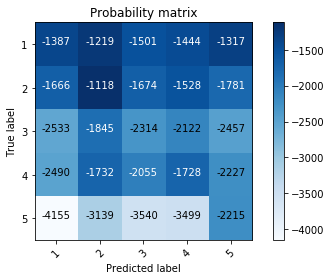

In [45]:
labels_str = [str(i+1) for i in range(5)]
plot_confusion_matrix(cm.astype(np.int),labels_str)